# Titanic Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp


In [ ]:
df=pd.read_csv('C:/Users/Ilenia/Desktop/university/Analisi dati/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df=df.drop(columns= ['Cabin', 'PassengerId'])

In [ ]:
df['Survived']= df['Survived'].astype(str)
df['Pclass']= df['Pclass'].astype(str)

In [ ]:
columns= [df['Survived'], df['Pclass'], df['Sex'], df['Age'],df['SibSp'],df['Parch'],df['Fare'],df['Embarked'] ]
for a in columns:
    print(a.describe())

count     891
unique      2
top         0
freq      549
Name: Survived, dtype: object
count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: object
count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: floa

Distribution Plot


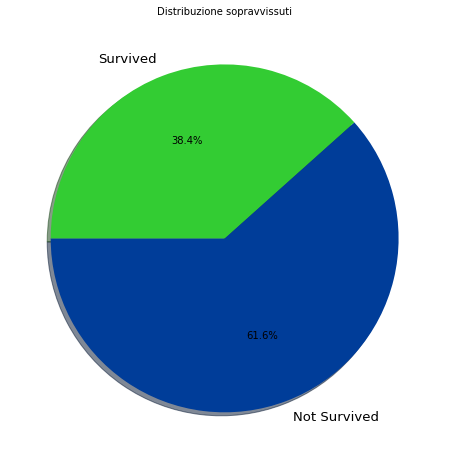

In [ ]:
colors= ['#003d99','#33cc33']
labels= ['Not Survived', 'Survived']
sizes= df['Survived'].value_counts()
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180,colors = colors)
plt.title('Distribuzione sopravvissuti')
plt.show()

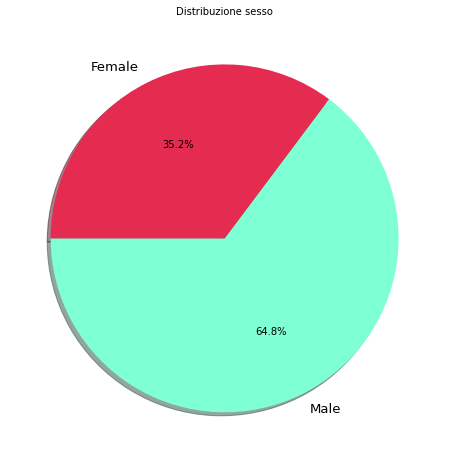

In [ ]:
colors= ['#7FFFD4','#E52B50']
labels= ['Male', 'Female']
sizes= df['Sex'].value_counts()
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180,colors = colors)
plt.title('Distribuzione sesso')
plt.show()

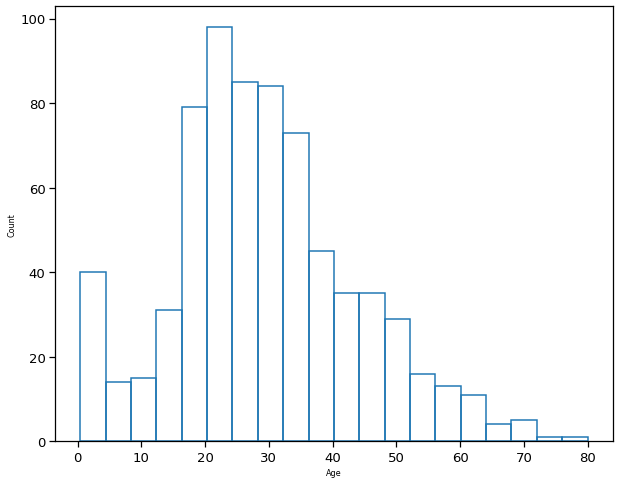

In [ ]:
sns.histplot(data=df, x="Age",  fill=False)


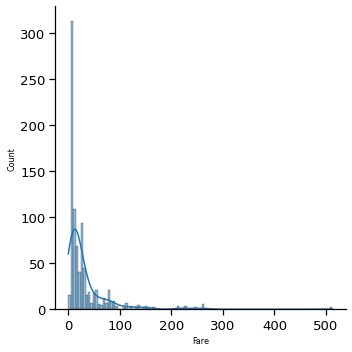

In [ ]:
sns.displot(data=df, x="Fare", kde=True)


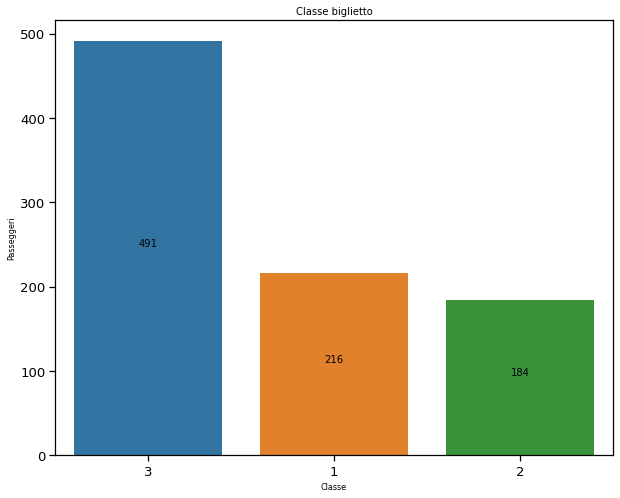

In [ ]:
ax = sns.countplot(x="Pclass", data=df)
plt.title("Classe biglietto")
plt.ylabel("Passeggeri")
plt.xlabel("Classe")
for rec in ax.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}".format(height),
              ha='center', 
              va='bottom')
plt.show()

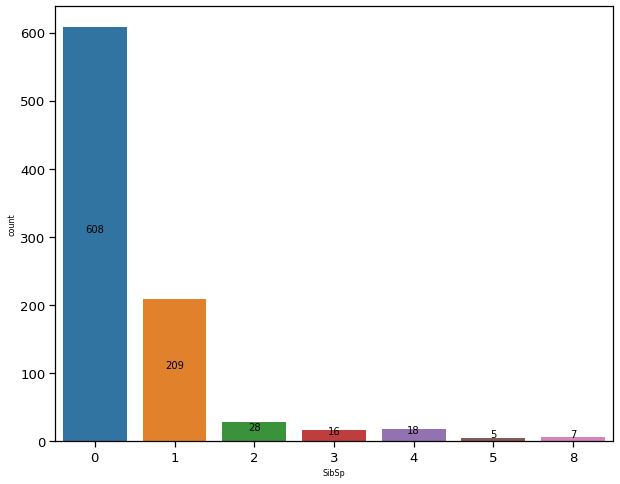

In [ ]:
ax = sns.countplot(x="SibSp", data=df)
for rec in ax.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}".format(height),
              ha='center', 
              va='bottom')
plt.show()

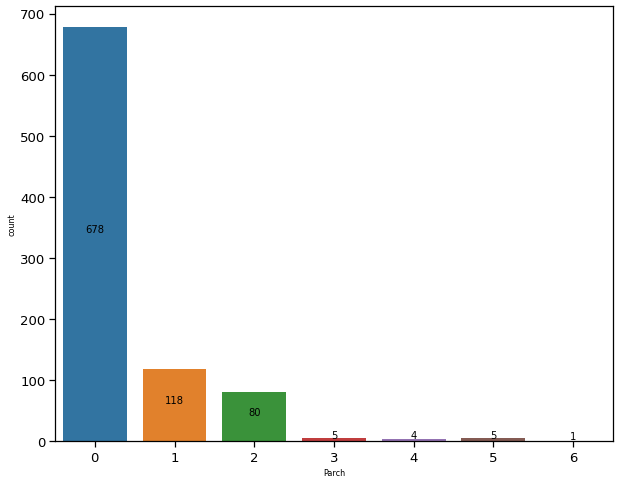

In [ ]:
ax = sns.countplot(x="Parch", data=df)
for rec in ax.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}".format(height),
              ha='center', 
              va='bottom')
plt.show()

In [ ]:
numerical=[df['Age'], df['Fare'], df['SibSp'], df['Parch']]
for a in numerical:
    
    print('The median is: ', a.median())
    print('The Mad is : ', a.mad())
    print('The variance range is: ', a.max()-a.min())
    print()

The median is:  28.0
The Mad is :  11.322944471906405
The variance range is:  79.58

The median is:  14.4542
The Mad is :  28.16369184877832
The variance range is:  512.3292

The median is:  0.0
The Mad is :  0.7137795211121056
The variance range is:  8

The median is:  0.0
The Mad is :  0.5807419499899789
The variance range is:  6



In [ ]:
df['Pclass']= df['Pclass'].astype(int)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


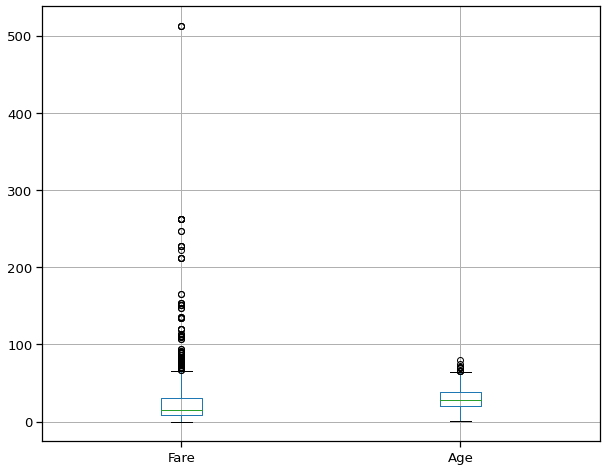

In [ ]:
df.boxplot(column= ['Fare', 'Age'])

In [ ]:
young= df[df['Age']<1]
young


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
305,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
469,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C
644,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C
755,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S
803,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C
831,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S


In [ ]:
fare= df[df['Fare']<1]
len(fare)


15

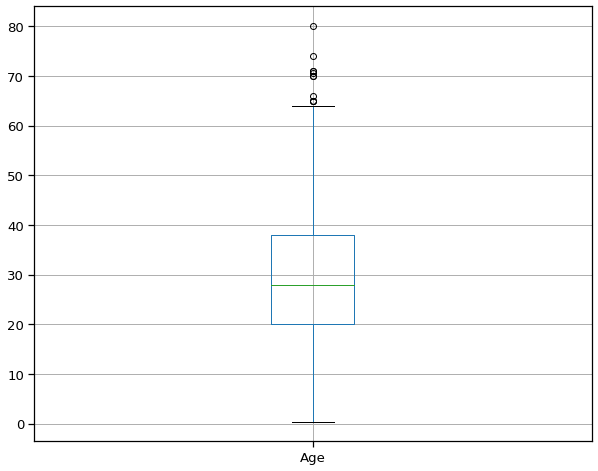

In [ ]:
df.boxplot(column='Age')

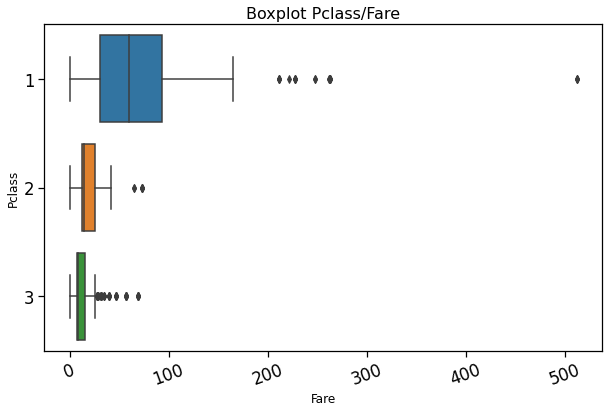

In [ ]:
plt.figure(figsize=(10,6))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":12})
sns.boxplot(x='Fare', y = 'Pclass', data=df, orient="h")
plt.title("Boxplot Pclass/Fare")
plt.xlabel("Fare")
plt.ylabel("Pclass")
plt.xticks(rotation=20)
plt.savefig('corruption.png', dpi=1200)
plt.show()

In [ ]:
zero=df[df['Fare']==0]
zero
df = df.loc[df['Fare'] !=0]


Analisi delle 3 classi passegeri

In [ ]:
third_class= df[df['Pclass'] == 3]

In [ ]:
max=third_class['Fare'].max()
mean= third_class['Fare'].mean()
min= third_class['Fare'].min()

In [ ]:
print(max)
print(mean)
print(min)

69.55
13.787874948665301
4.0125


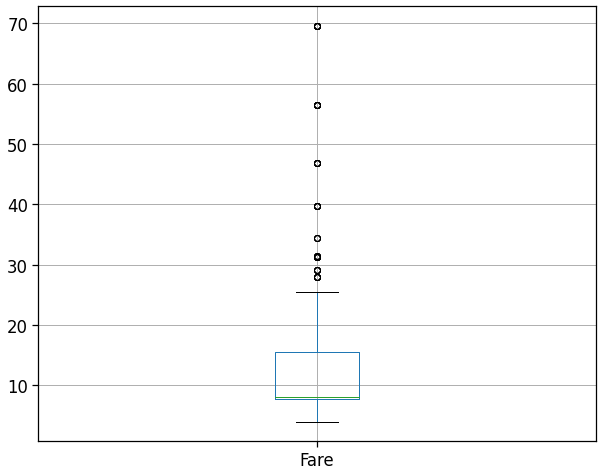

In [ ]:
boxplot=third_class.boxplot(column=['Fare'])

In [ ]:
toDelete={0}
outlier= third_class[third_class['Fare'] > 35]
outlier=outlier['Fare'].values

outlier


array([39.6875, 46.9   , 46.9   , 56.4958, 69.55  , 39.6875, 56.4958,
       69.55  , 69.55  , 39.6875, 69.55  , 46.9   , 46.9   , 56.4958,
       39.6875, 56.4958, 46.9   , 46.9   , 39.6875, 56.4958, 69.55  ,
       39.6875, 56.4958, 56.4958, 69.55  , 69.55  ])

In [ ]:
print(type(toDelete))

<class 'set'>


In [ ]:
for a in outlier:
    toDelete.add(a)
toDelete

{0, 39.6875, 46.9, 56.4958, 69.55}

In [ ]:
second_class= df[df['Pclass'] == 2]

In [ ]:
second_class.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
20,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,S
21,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,S


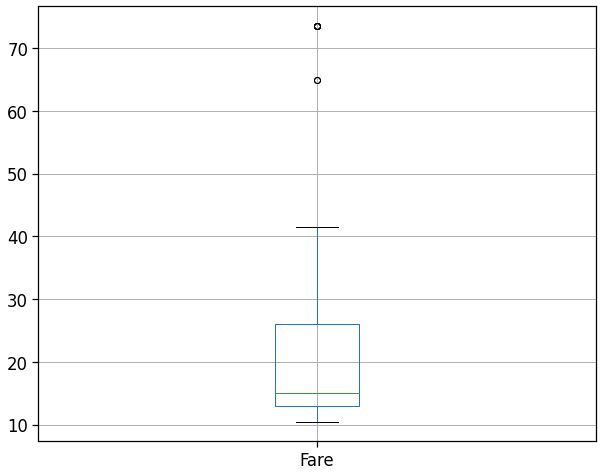

In [ ]:
boxplot=second_class.boxplot(column=['Fare'])

In [ ]:
outlier= second_class[second_class['Fare'] > 60]
outlier=outlier['Fare'].values

In [ ]:
for a in outlier:
    toDelete.add(a)
toDelete

{0, 39.6875, 46.9, 56.4958, 65.0, 69.55, 73.5}

In [ ]:
second_class.min()

Survived                      0
Pclass                        2
Name        Abelson, Mr. Samuel
Sex                      female
Age                        0.67
SibSp                         0
Parch                         0
Ticket                    11668
Fare                       10.5
Embarked                      C
dtype: object

In [ ]:
second_class.max()

Survived                            1
Pclass                              2
Name        del Carlo, Mr. Sebastiano
Sex                              male
Age                                70
SibSp                               3
Parch                               3
Ticket                      W/C 14208
Fare                             73.5
Embarked                            S
dtype: object

In [ ]:
first_class= df[df['Pclass'] == 1]

In [ ]:
first_class.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S


In [ ]:
print(first_class.min())
print(first_class.max())

Survived                                0
Pclass                                  1
Name        Allen, Miss. Elisabeth Walton
Sex                                female
Age                                  0.92
SibSp                                   0
Parch                                   0
Ticket                             110152
Fare                                    5
dtype: object
Survived                           1
Pclass                             1
Name        Young, Miss. Marie Grice
Sex                             male
Age                               80
SibSp                              3
Parch                              4
Ticket                     WE/P 5735
Fare                         512.329
dtype: object


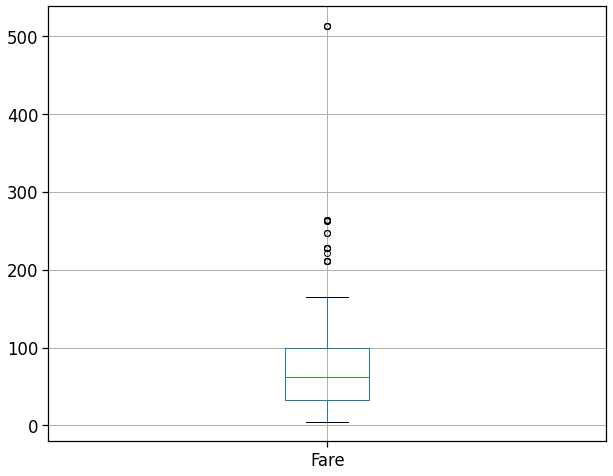

In [ ]:
first_class.boxplot(column='Fare')

In [ ]:
outlier= first_class[first_class['Fare'] > 200]
outlier=outlier['Fare'].values
for a in outlier:
    toDelete.add(a)
toDelete


{0,
 39.6875,
 46.9,
 56.4958,
 65.0,
 69.55,
 73.5,
 211.3375,
 211.5,
 221.7792,
 227.525,
 247.5208,
 262.375,
 263.0,
 512.3292}

In [ ]:
outlier= first_class[first_class['Fare'] <25]
outlier=outlier['Fare'].values
for a in outlier:
    toDelete.add(a)
toDelete

{0,
 5.0,
 39.6875,
 46.9,
 56.4958,
 65.0,
 69.55,
 73.5,
 211.3375,
 211.5,
 221.7792,
 227.525,
 247.5208,
 262.375,
 263.0,
 512.3292}

In [ ]:
first_class['Fare'].min()

5.0

In [ ]:
outlier= first_class[first_class['Fare'] < 26.55]
outlier['Fare'].value_counts()

26.2875    3
25.9292    2
26.0000    2
25.9250    1
26.3875    1
25.5875    1
26.2833    1
5.0000     1
Name: Fare, dtype: int64

In [ ]:
for a in toDelete:
    df = df.loc[df['Fare'] !=a]

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


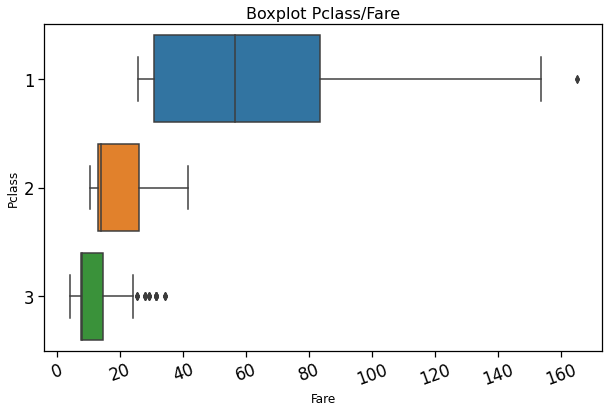

In [ ]:
plt.figure(figsize=(10,6))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":12})
sns.boxplot(x='Fare', y = 'Pclass', data=df, orient="h")
plt.title("Boxplot Pclass/Fare")
plt.xlabel("Fare")
plt.ylabel("Pclass")
plt.xticks(rotation=20)
plt.savefig('corruption.png', dpi=1200)
plt.show()

In [ ]:
def z_score(variable, z_score_set):

  mean= variable.mean()
  std= variable.std()
  for a in variable:
    score=(a-mean)/std
    score=abs(score)
    z_score_set.add(score)


  cont=0
  for a in z_score_set:
    if a>threshold:
        cont=cont+1
  print('Z-score outlier: ', cont)    

In [ ]:
z_score_set={0}

z_score(first_class['Fare'],z_score_set)
z_score(second_class['Fare'],z_score_set)
z_score(third_class['Fare'],z_score_set)

Z-score outlier:  4
Z-score outlier:  6
Z-score outlier:  10


In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         157
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [ ]:
outlier= df[df['Fare'] > 160]
outlier=outlier['Fare'].values
outlier


array([164.8667, 164.8667])

In [ ]:
for a in outlier:
    toDelete.add(a)
toDelete



{0,
 5.0,
 39.6875,
 46.9,
 56.4958,
 65.0,
 69.55,
 73.5,
 164.8667,
 211.3375,
 211.5,
 221.7792,
 227.525,
 247.5208,
 262.375,
 263.0,
 512.3292}

In [ ]:
for a in toDelete:
    df = df.loc[df['Fare'] !=a]

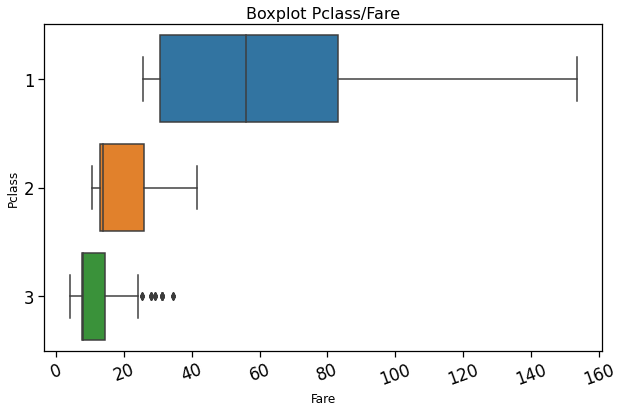

In [ ]:
plt.figure(figsize=(10,6))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":12})
sns.boxplot(x='Fare', y = 'Pclass', data=df, orient="h")
plt.title("Boxplot Pclass/Fare")
plt.xlabel("Fare")
plt.ylabel("Pclass")
plt.xticks(rotation=20)
plt.savefig('corruption.png', dpi=1200)
plt.show()

In [ ]:
mode= df['Embarked'].mode()
mode
df['Embarked'].fillna('S', inplace= True)


In [ ]:
mean= df['Age'].mean()
round(mean)
df['Age'].fillna(mean, inplace= True)
df['Age']= round(df['Age'])

df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 820, dtype: float64

In [ ]:
df.count()

Survived    820
Pclass      820
Name        820
Sex         820
Age         820
SibSp       820
Parch       820
Ticket      820
Fare        820
Embarked    820
dtype: int64

Distribution Plot dopo la pulizia


In [ ]:
columns= [df['Survived'], df['Pclass'], df['Sex'], df['Age'],df['SibSp'],df['Parch'],df['Fare'],df['Embarked'] ]
for a in columns:
    print(a.describe())

count     820
unique      2
top         0
freq      502
Name: Survived, dtype: object
count    820.000000
mean       2.332927
std        0.825502
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
count      820
unique       2
top       male
freq       528
Name: Sex, dtype: object
count    820.000000
mean      29.895122
std       13.114550
min        0.000000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64
count    820.000000
mean       0.414634
std        0.764781
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: SibSp, dtype: float64
count    820.000000
mean       0.331707
std        0.737762
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: Parch, dtype: float64
count    820.000000
mean      25.455731
std       28.441329
min        4.01250

In [ ]:
numerical=[df['Age'], df['Fare'], df['SibSp'], df['Parch']]
for a in numerical:
    
    print('The median is: ', a.median())
    print('The Mad is : ', a.mad())
    print('The variance range is: ', a.max()-a.min())
    print('The variance is: ', a.var())
    print()

The median is:  30.0
The Mad is :  9.187239738251062
The variance range is:  80.0
The variance is:  171.99142916703894

The median is:  13.0
The Mad is :  19.111181604402077
The variance range is:  149.45000000000002
The variance is:  808.909210882555

The median is:  0.0
The Mad is :  0.574419988102324
The variance range is:  4
The variance is:  0.5848893653771718

The median is:  0.0
The Mad is :  0.5194051160023774
The variance range is:  5
The variance is:  0.5442925638047647



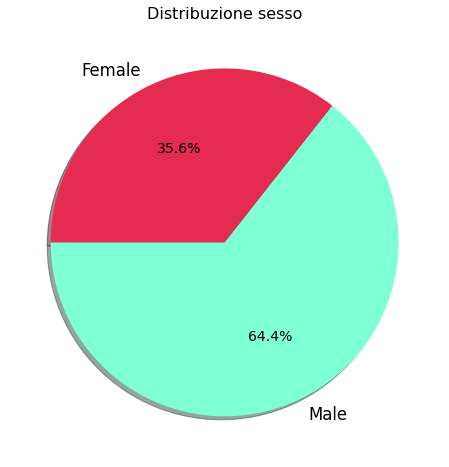

In [ ]:
colors= ['#7FFFD4','#E52B50']
labels= ['Male', 'Female']
sizes= df['Sex'].value_counts()
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180,colors = colors)
plt.title('Distribuzione sesso')
plt.show()

In [ ]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 820, dtype: float64

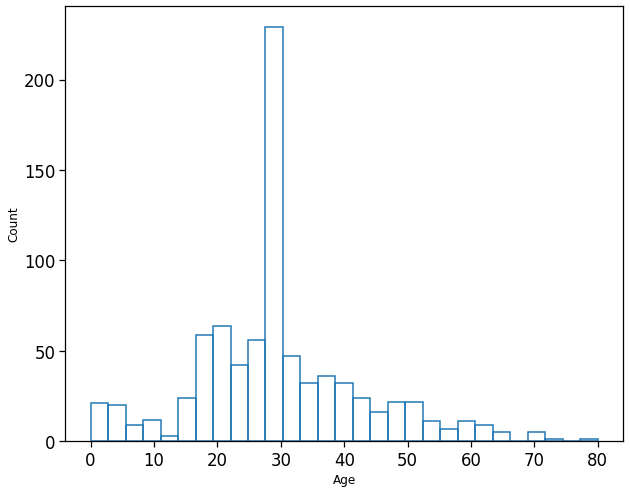

In [ ]:
sns.histplot(data=df, x="Age",  fill=False)

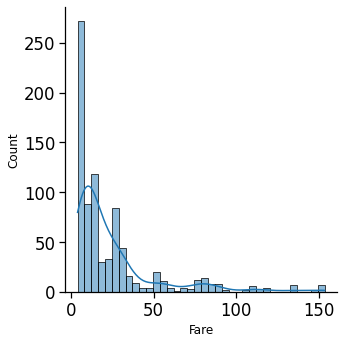

In [ ]:
sns.displot(data=df, x="Fare", kde=True)

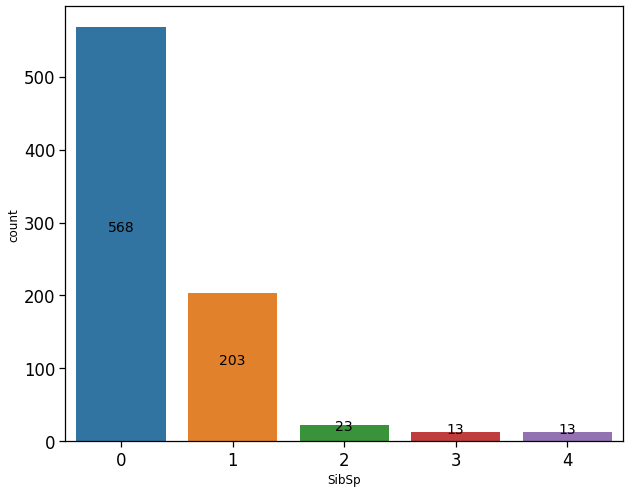

In [ ]:
ax = sns.countplot(x="SibSp", data=df)
for rec in ax.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}".format(height),
              ha='center', 
              va='bottom')
plt.show()


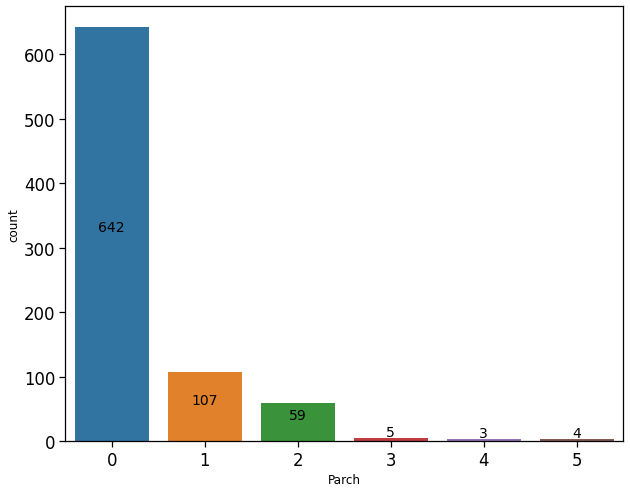

In [ ]:
ax = sns.countplot(x="Parch", data=df)
for rec in ax.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}".format(height),
              ha='center', 
              va='bottom')
plt.show()

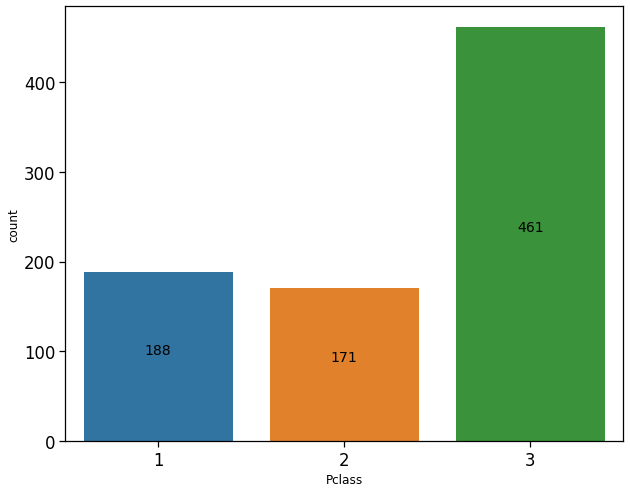

In [ ]:
ax = sns.countplot(x="Pclass", data=df)
for rec in ax.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}".format(height),
              ha='center', 
              va='bottom')
plt.show()

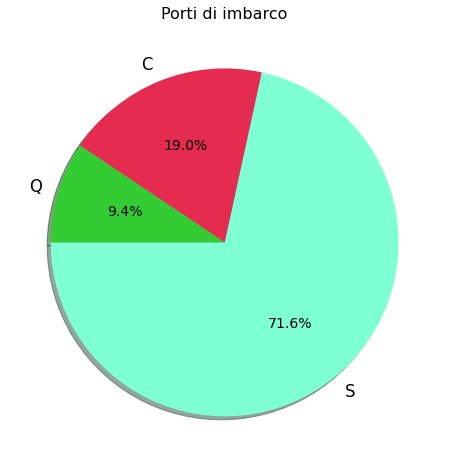

In [ ]:
colors= ['#7FFFD4','#E52B50', '#33cc33']
labels= ['S', 'C', 'Q']
sizes= df['Embarked'].value_counts()
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180,colors = colors)
plt.title('Porti di imbarco')
plt.show()

Correlazione e plot

Text(0.5, 1.0, 'Titanic correlation heatmap')

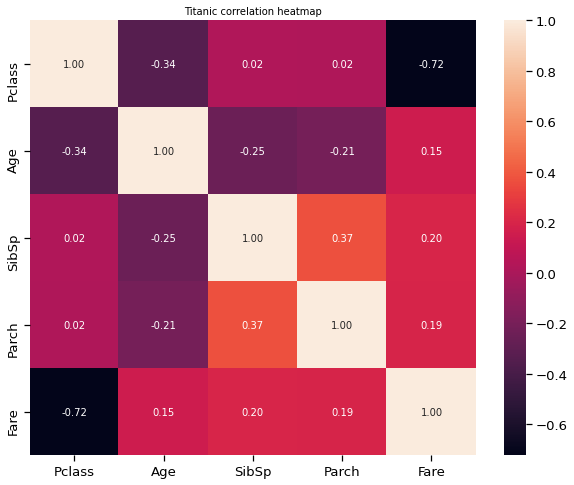

In [ ]:
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Titanic correlation heatmap")


In [ ]:
max=df['Fare'].max()
print(max)

153.4625


In [ ]:
c=max/3
b=c*2

In [ ]:
print(c, b)

51.15416666666667 102.30833333333334


In [ ]:
fare_bin=[]
for a in df['Fare']:
    if a<=c:
        fare_bin.append('3')
    elif a>c and a<=b:
        fare_bin.append('2')
    else:
        fare_bin.append('1')
fare_bin
df['fare_bin']= fare_bin

Creata nuova classe per nuove analisi, rivelata però inutile

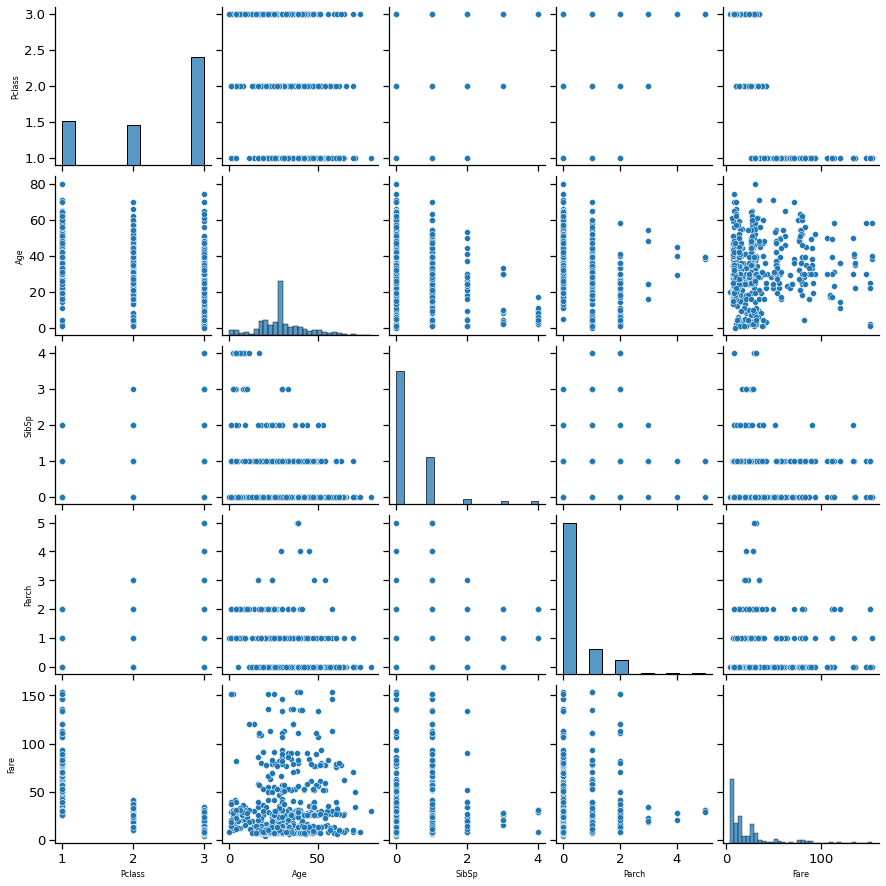

In [ ]:
sns.pairplot(df)

In [ ]:
x = df['Age']
y = df['Fare']
(corr_pearson, pvalue) = sp.pearsonr(x, y)
print("Coefficiente di Pearson:", round(corr_pearson,2))
print("p-value:", round(pvalue,10))

Coefficiente di Pearson: 0.15
p-value: 2.13005e-05


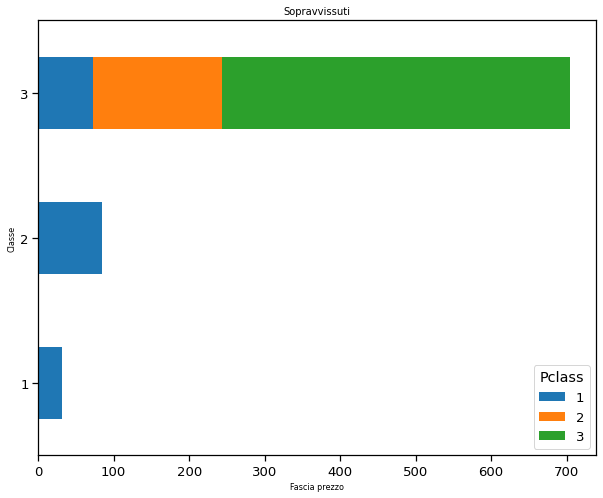

In [ ]:
summary=pd.crosstab(df['fare_bin'], df['Pclass'])
plt.rcParams["figure.figsize"] = [10,8]
summary.plot(kind="barh",stacked=True) 
plt.title("Sopravvissuti")
plt.ylabel("Classe")
plt.xlabel("Fascia prezzo")
for rec in ax.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}".format(height),
              ha='center', 
              va='bottom')
plt.show()
plt.show()

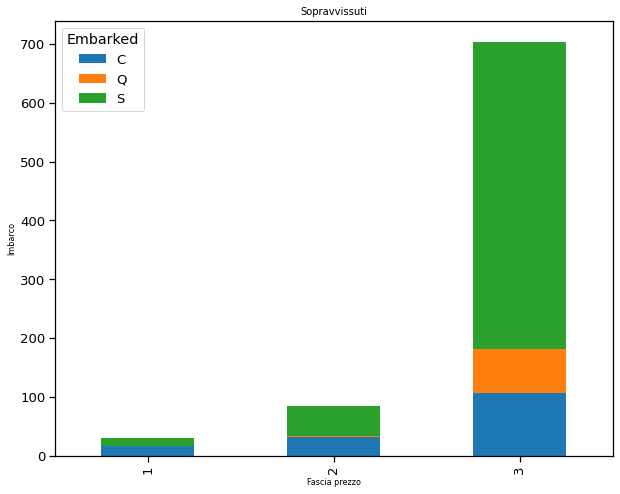

In [ ]:
summary=pd.crosstab(df['fare_bin'],df['Embarked'])
plt.rcParams["figure.figsize"] = [10,8]
summary.plot(kind="bar",stacked=True) 
plt.title("Sopravvissuti")
plt.xlabel("Fascia prezzo")
plt.ylabel("Imbarco")
for rec in ax.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}".format(height),
              ha='center', 
              va='bottom')
plt.show()
plt.show()

In [ ]:
 df['fare_bin'].value_counts()

3    704
2     85
1     31
Name: fare_bin, dtype: int64

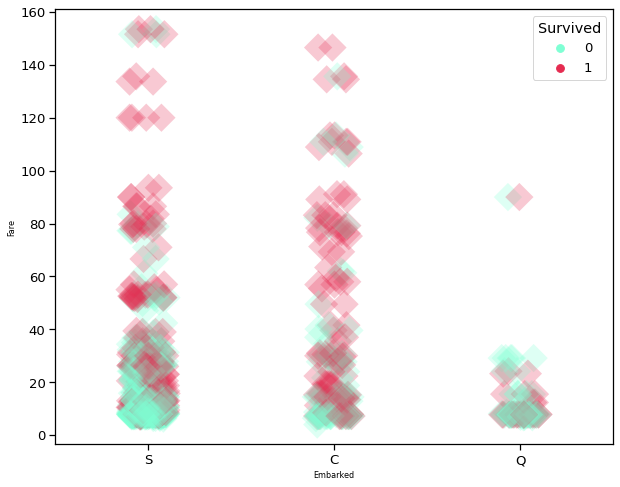

In [ ]:
ax =  sns.stripplot(x="Embarked", y="Fare", hue="Survived", data=df, palette=colors, size=20, marker="D", edgecolor="gray", alpha=.25)

In [ ]:
colors=['#007FFF','#E52B50' ]

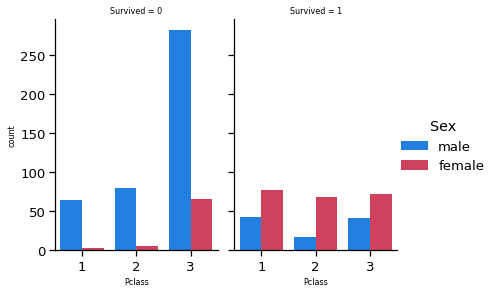

In [ ]:
g = sns.catplot(x="Pclass", hue="Sex", palette=colors, col="Survived", data=df, kind="count", height=4, aspect=.7);

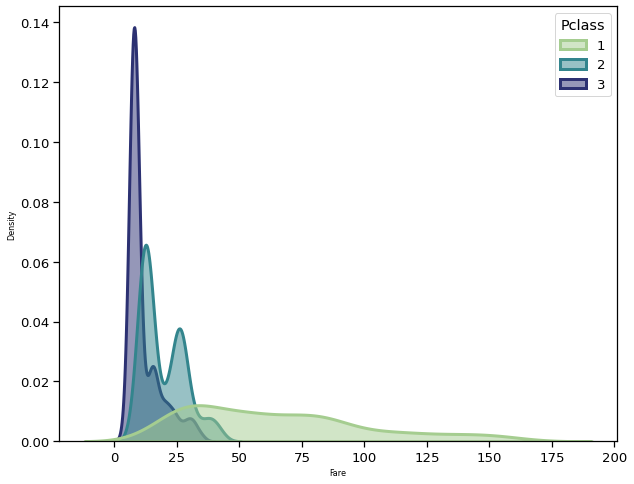

In [ ]:
sns.kdeplot(
   data=df, x="Fare", hue="Pclass",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=3,
)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


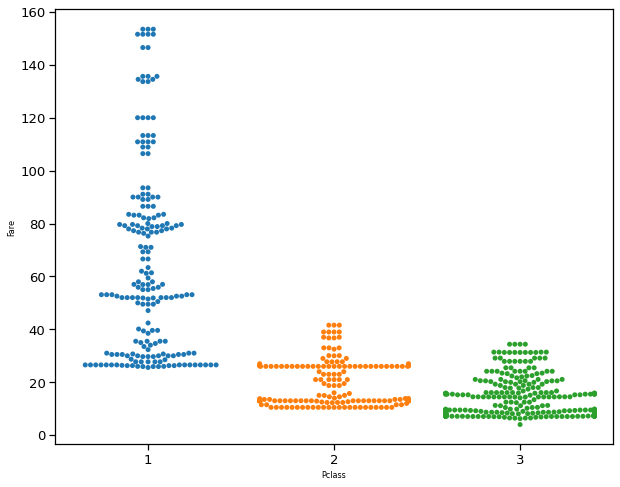

In [ ]:
ax = sns.swarmplot(x="Pclass", y="Fare", data=df)



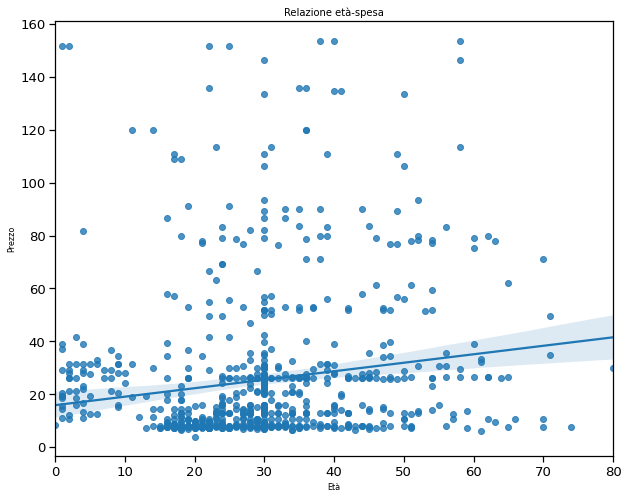

In [ ]:
sns.regplot(x="Age", y="Fare", fit_reg=True, data=df) 
plt.title("Relazione età-spesa")
plt.xlabel("Età")
plt.ylabel("Prezzo")
plt.show()

In [ ]:
x = df['Age']
y = df['Fare']
(corr_pearson, pvalue) = sp.pearsonr(x, y)
print("Coefficiente di Pearson:", round(corr_pearson,2))
print("p-value:", round(pvalue,10 ))

Coefficiente di Pearson: 0.15
p-value: 2.13005e-05


In [ ]:
x = df['SibSp']
y = df['Parch']
(corr_pearson, pvalue) = sp.pearsonr(x, y)
print("Coefficiente di Pearson:", round(corr_pearson,2))
print("p-value:", round(pvalue,10 ))

Coefficiente di Pearson: 0.37
p-value: 0.0


In [ ]:
color=['#009933', '#333399', '#990033']

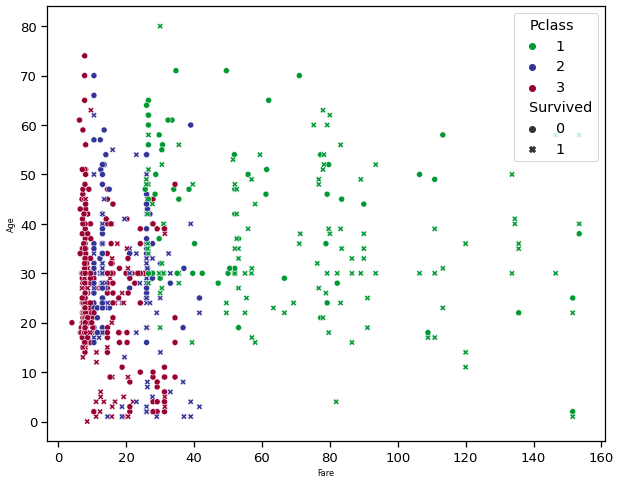

In [ ]:
sns.scatterplot(data=df, x="Fare", y="Age", hue="Pclass", style="Survived", palette=color)

In [ ]:
prima= df[df['Pclass']==1]
survived10= prima[prima['Age']<=10]
survived_1= survived10[survived10['Survived']=='1']
survived_0=survived10[survived10['Survived']=='0']
len0=len(survived_0)
len1=len(survived_1)
print('Bambini sotto i 10 anni per la prima classe: Sopravvissuti: {}, Non sopravvissuti: {}'.format(len1, len0))

Bambini sotto i 10 anni per la prima classe: Sopravvissuti: 2, Non sopravvissuti: 1


In [ ]:
seconda= df[df['Pclass']==2]
survived10= seconda[seconda['Age']<=10]
survived_1= survived10[survived10['Survived']=='1']
survived_0=survived10[survived10['Survived']=='0']
len0=len(survived_0)
len1=len(survived_1)
print('Bambini sotto i 10 anni per la seconda classe: Sopravvissuti: {}, Non sopravvissuti: {}'.format(len1, len0))

Bambini sotto i 10 anni per la seconda classe: Sopravvissuti: 17, Non sopravvissuti: 0


In [ ]:
terza= df[df['Pclass']==3]
survived10= terza[terza['Age']<=10]
survived_1= survived10[survived10['Survived']=='1']
survived_0=survived10[survived10['Survived']=='0']
len0=len(survived_0)
len1=len(survived_1)
print('Bambini sotto i 10 anni per la terza classe: Sopravvissuti: {}, Non sopravvissuti: {}'.format(len1, len0))

Bambini sotto i 10 anni per la terza classe: Sopravvissuti: 19, Non sopravvissuti: 20


In [ ]:
den=len(terza)/820
den


0.5621951219512196

In [ ]:
df['Age'].describe()

count    820.000000
mean      29.895122
std       13.114550
min        0.000000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df['Age'].value_counts()

30.0    184
24.0     28
22.0     27
28.0     26
18.0     23
       ... 
53.0      1
66.0      1
80.0      1
12.0      1
74.0      1
Name: Age, Length: 71, dtype: int64

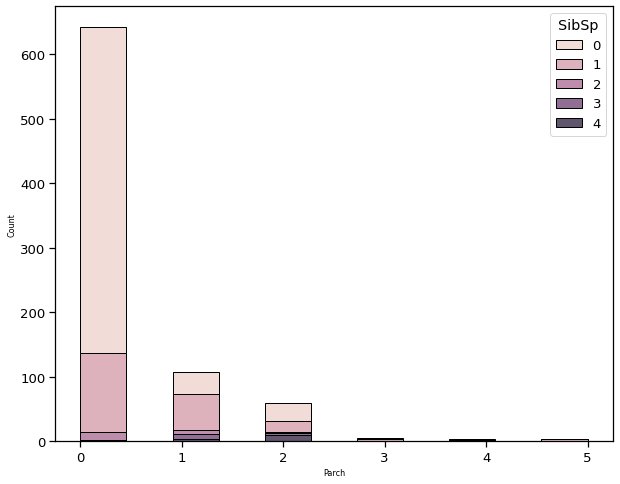

In [ ]:
sns.histplot(data=df, x="Parch", hue="SibSp", multiple="stack")

In [ ]:
uno= df[df['SibSp']==1]
uno_uno=uno[uno['Parch']==1]
len(uno_uno)

56

Quanti sono coloro che hanno un 'Parch' e un 'SibSp'

In [ ]:
cinque=df[df['Parch']==5]
cinque

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,fare_bin
13,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S,3
25,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,S,3
610,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,S,3
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,3


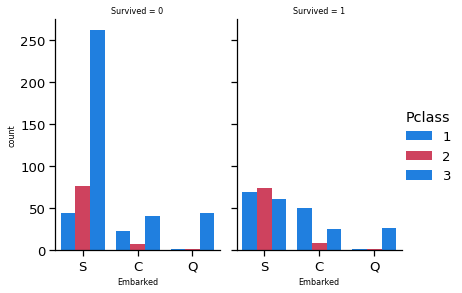

In [ ]:
g = sns.catplot(x="Embarked", hue="Pclass", palette=colors, col="Survived", data=df, kind="count", height=4, aspect=.7);

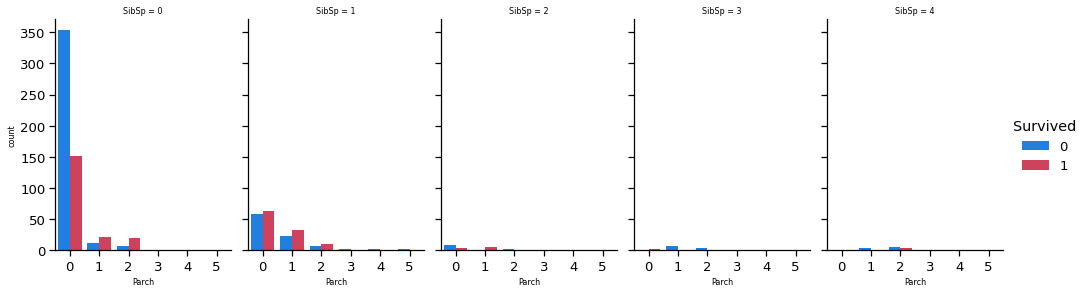

In [ ]:
g = sns.catplot(x="Parch", hue="Survived", palette=colors, col="SibSp", data=df, kind="count", height=4, aspect=.7)

In [ ]:
a=df[df['Embarked']=='S']
b= a[a['Survived']=='1']
c= b[b['Fare']<40]
d=a[a['Survived']=='0']
e=d[d['Fare']<40]
print(len(c))
print(len(e))


158
360


In [ ]:
a=df[df['Embarked']=='C']
b= a[a['Survived']=='1']
c= b[b['Fare']<40]
d=a[a['Survived']=='0']
e=d[d['Fare']<40]
print(len(c))
print(len(e))


41
59


In [ ]:
a=df[df['Embarked']=='Q']
b= a[a['Survived']=='1']
c= b[b['Fare']<40]
d=a[a['Survived']=='0']
e=d[d['Fare']<40]
print(len(c))
print(len(e))

29
46


Sopravvissuti e non in base all'imbarco per spesa minore di 40 sterline

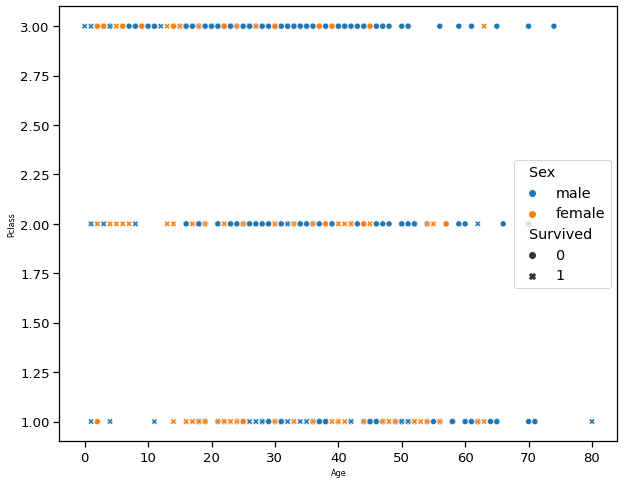

In [ ]:
sns.scatterplot(data=df, x="Age", y="Pclass", hue="Sex", style="Survived")